In [13]:
import seaborn as sns
sns.set_theme()

In [14]:
%matplotlib inline

In [15]:
tips = sns.load_dataset('tips')

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/var/folders/_7/178775hs6nz5h81l3b_pbb8h0000gn/T/ipykernel_37675/1274391954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False,bins=30)


<Axes: xlabel='total_bill'>

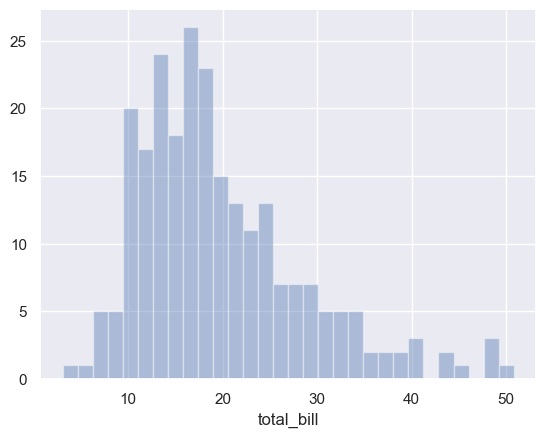

In [17]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

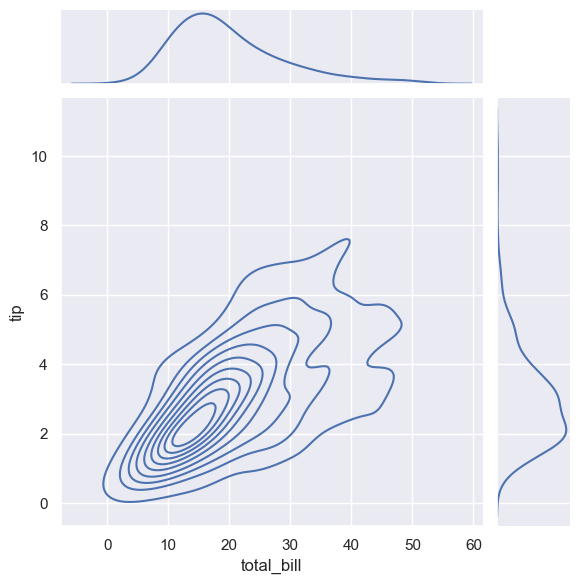

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

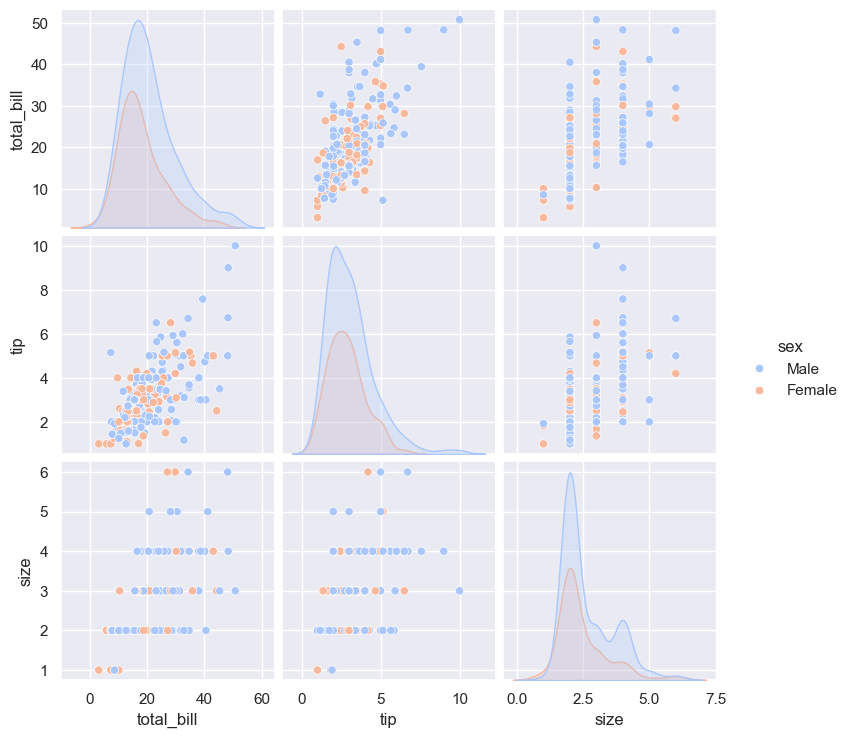

In [24]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<Axes: xlabel='total_bill'>

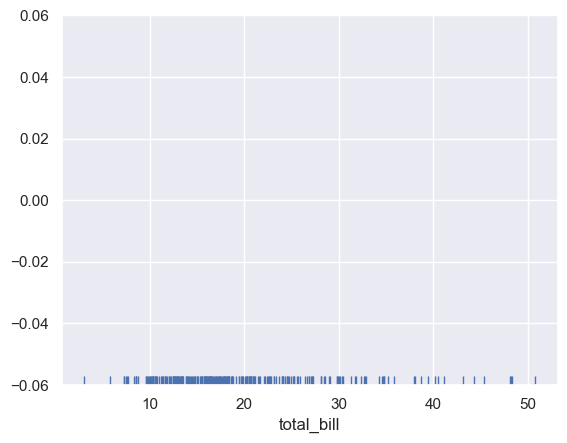

In [25]:
sns.rugplot(tips['total_bill'])

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

(0.0, 1.0)

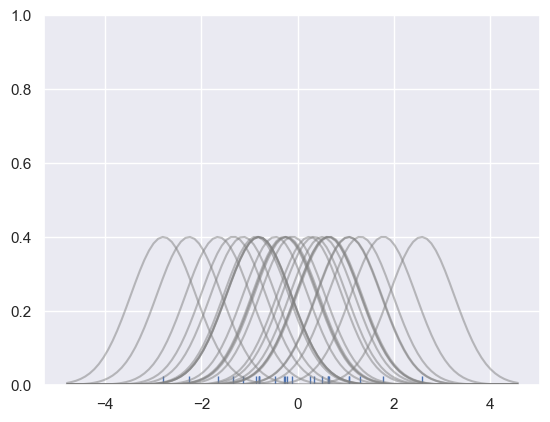

In [27]:
#create dataset
dataset = np.random.randn(25)

#create another rugplot
sns.rugplot(dataset)

#set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

#100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

#set up bandwidth, for the info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

#create an empty kernel list
kernel_list = []

#plot each basis function
for data_point in dataset:
    
    #create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

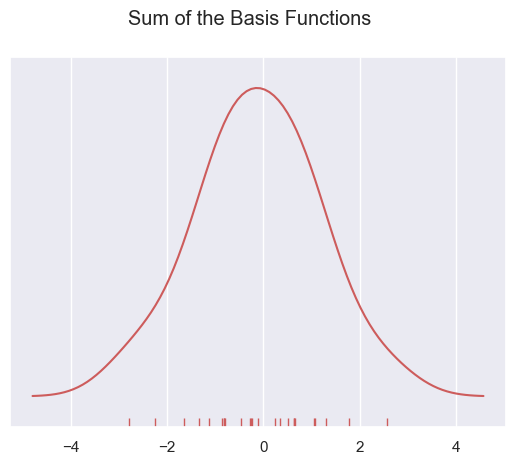

In [29]:
# to get the kde plot we sum these basis functions

# plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# add the initial rugplot
sns.rugplot(dataset,c='indianred')

# get rid of y-tick marks
plt.yticks([])

# set title
plt.suptitle("Sum of the Basis Functions")